Modelo ganador SD

🚀 GPU activada: NVIDIA GeForce RTX 2080 Ti

🔬 Analizando: 12655_0299_1.jpg | Diámetro: 15px
  👉 Cargando: cyto3... ✅ 250 detectadas.
  👉 Cargando: tissuenet_cp3... ✅ 0 detectadas.
  👉 Cargando: nuclei_cp3... ✅ 170 detectadas.


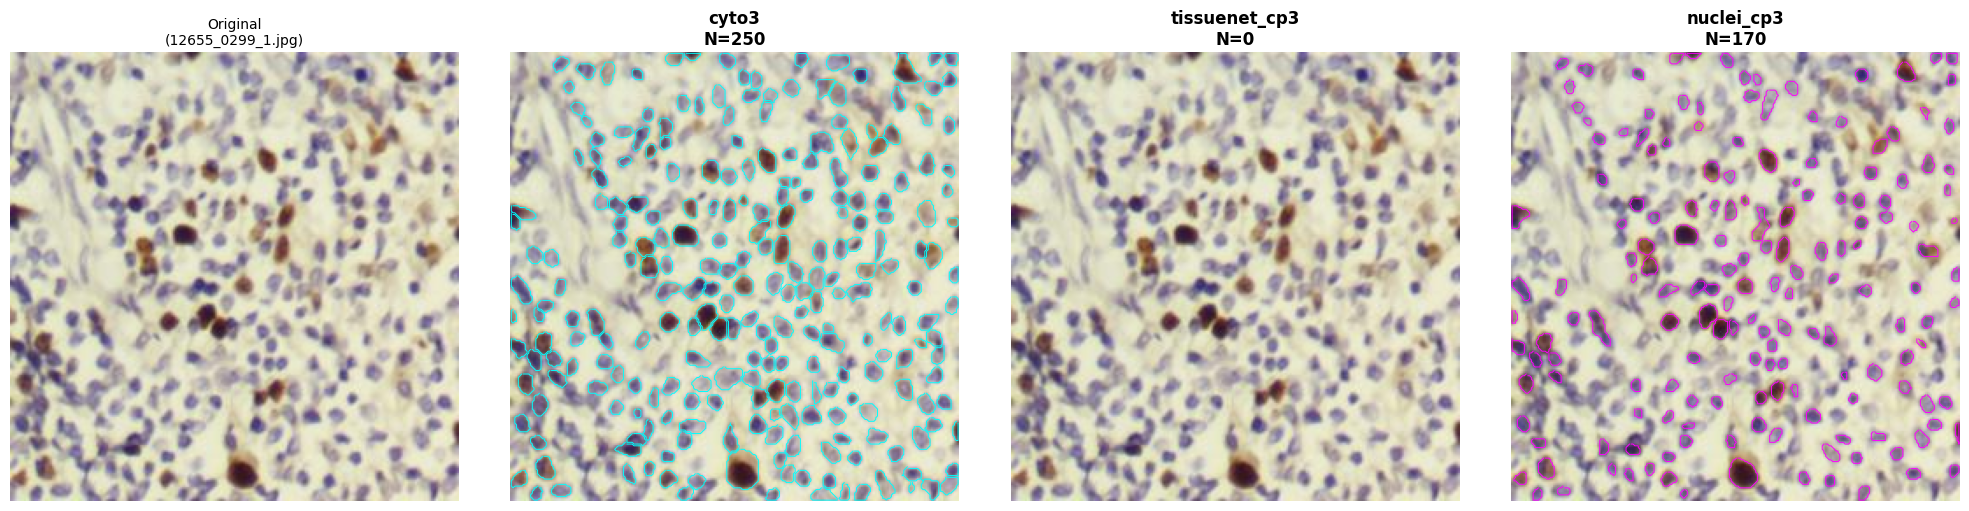

In [14]:
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from cellpose import models, io, plot, utils, core

DIR_MODELOS = "/media/HDD2/models"
TEST_DIR = "/media/HDD2/SHIDC-B-Ki-67/256x256 cropped images/test256"

# https://cellpose.readthedocs.io/en/v3.1.1.1/settings.html
DIAMETRO_OPTIMO = 15
CHANNELS = [0, 0] 

MIN_SIZE = 7 

ARCHIVOS_MODELOS = [
    "cyto3",        
    "tissuenet_cp3", 
    "nuclei_cp3"    
]

def verificar_gpu():
    use_gpu = core.use_gpu()
    if use_gpu:
        print(f"GPU activada: {torch.cuda.get_device_name(0)}")
    else:
        print("GPU no detectada. Corriendo en CPU (lento).")
    return use_gpu

def comparar_modelos_cp3(img_path, gpu_enabled=True):
    filename = os.path.basename(img_path)
    print(f"\nAnalizando: {filename} | Diámetro: {DIAMETRO_OPTIMO}px")
    
    img = io.imread(img_path)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
    
    axes[0].imshow(img)
    axes[0].set_title(f"Original\n({filename})", fontsize=10)
    axes[0].axis('off')

    for i, nombre_modelo in enumerate(ARCHIVOS_MODELOS):
        idx_ax = i + 1
        ruta_modelo = os.path.join(DIR_MODELOS, nombre_modelo)
        
        print(f"Cargando: {nombre_modelo}...", end=" ")
        
        if not os.path.exists(ruta_modelo):
            print("No encontrado (saltando)")
            axes[idx_ax].text(0.5, 0.5, "Modelo no encontrado", ha='center')
            axes[idx_ax].axis('off')
            continue

        try:
            model = models.CellposeModel(gpu=gpu_enabled, pretrained_model=ruta_modelo)
            
            masks, flows, styles = model.eval(
                img, 
                diameter=DIAMETRO_OPTIMO,
                channels=CHANNELS,
                invert=True,      
                min_size=MIN_SIZE,    
                cellprob_threshold=0.0, 
                flow_threshold=0.4      
            )
            
            n_celulas = masks.max()
            print(f"{n_celulas} detectadas.")
            axes[idx_ax].imshow(img)
            outlines = utils.outlines_list(masks)
            colors = ['cyan', 'lime', 'magenta'] 
            c = colors[i % len(colors)]
            
            for o in outlines:
                axes[idx_ax].plot(o[:, 0], o[:, 1], color=c, lw=0.7)
            
            axes[idx_ax].set_title(f"{nombre_modelo}\nN={n_celulas}", color='black', fontweight='bold')
            axes[idx_ax].axis('off')
            del model
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"Error: {e}")
            axes[idx_ax].set_title(f"Error: {nombre_modelo}", color='red')
            axes[idx_ax].axis('off')

    plt.show()

if __name__ == "__main__":
    use_gpu = verificar_gpu()
    
    test_files = sorted(glob.glob(os.path.join(TEST_DIR, "*.jpg")))
    
    if len(test_files) > 0:
        comparar_modelos_cp3(test_files[0], gpu_enabled=use_gpu)
    else:
        print(f"No se encontraron imágenes en: {TEST_DIR}")

Modelo ganador HD

🚀 GPU activada: NVIDIA GeForce RTX 2080 Ti
🎯 Imagen objetivo encontrada: p1_0299_1.jpg

🔬 Analizando: p1_0299_1.jpg | Diámetro: 72px
  👉 Cargando: cyto3... 

✅ 369 detectadas.
  👉 Cargando: tissuenet_cp3... ✅ 0 detectadas.
  👉 Cargando: nuclei_cp3... ✅ 254 detectadas.


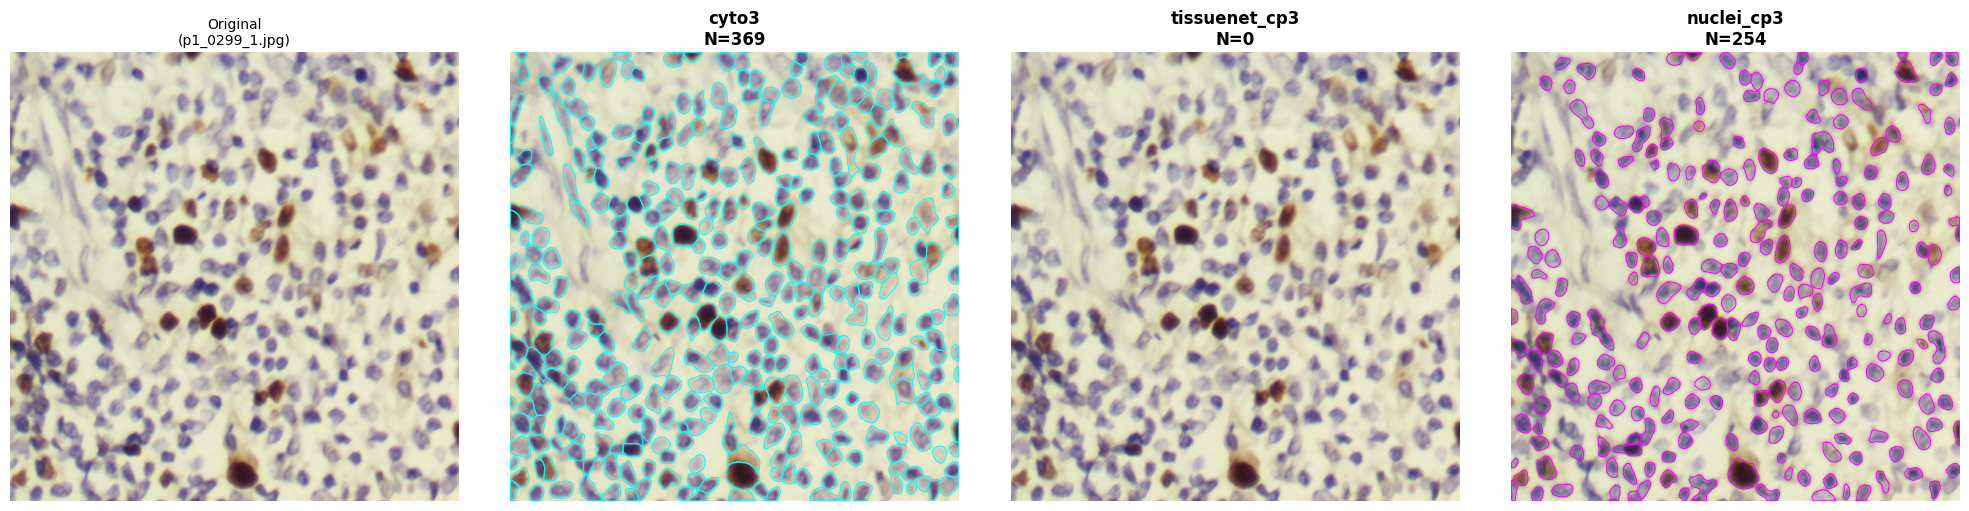

In [12]:
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from cellpose import models, io, plot, utils, core

DIR_MODELOS = "/media/HDD2/models"
TEST_DIR = Path("/media/HDD2/SHIDC-B-Ki-67/bare images/Test")
SELECTED_FILENAME = "p1_0299_1.jpg"
DIAMETRO_OPTIMO = 72
CHANNELS = [0, 0] 
.
MIN_SIZE = 30

ARCHIVOS_MODELOS = [
    "cyto3",        
    "tissuenet_cp3", 
    "nuclei_cp3"    
]

def verificar_gpu():
    use_gpu = core.use_gpu()
    if use_gpu:
        print(f"GPU activada: {torch.cuda.get_device_name(0)}")
    else:
        print("GPU no detectada. Corriendo en CPU (lento).")
    return use_gpu

def comparar_modelos_cp3(img_path, gpu_enabled=True):
    filename = os.path.basename(img_path)
    print(f"\nAnalizando: {filename} | Diámetro: {DIAMETRO_OPTIMO}px")
    
    img = io.imread(img_path)

    fig, axes = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)

    axes[0].imshow(img)
    axes[0].set_title(f"Original\n({filename})", fontsize=10)
    axes[0].axis('off')

    for i, nombre_modelo in enumerate(ARCHIVOS_MODELOS):
        idx_ax = i + 1
        ruta_modelo = os.path.join(DIR_MODELOS, nombre_modelo)
        
        print(f"Cargando: {nombre_modelo}...", end=" ")
        
        # Verificar existencia
        if not os.path.exists(ruta_modelo):
            print("No encontrado (saltando)")
            axes[idx_ax].text(0.5, 0.5, "Modelo no encontrado", ha='center')
            axes[idx_ax].axis('off')
            continue

        try:
            model = models.CellposeModel(gpu=gpu_enabled, pretrained_model=ruta_modelo)
            
            masks, flows, styles = model.eval(
                img, 
                diameter=DIAMETRO_OPTIMO,
                channels=CHANNELS,
                invert=True,  
                min_size=MIN_SIZE,   
                cellprob_threshold=0.0, 
                flow_threshold=0.4     
            )
            
            n_celulas = masks.max()
            print(f"{n_celulas} detectadas.")
            axes[idx_ax].imshow(img)

            outlines = utils.outlines_list(masks)
            
            colors = ['cyan', 'lime', 'magenta'] 
            c = colors[i % len(colors)]

            for o in outlines:
                axes[idx_ax].plot(o[:, 0], o[:, 1], color=c, lw=0.7)
            
            axes[idx_ax].set_title(f"{nombre_modelo}\nN={n_celulas}", color='black', fontweight='bold')
            axes[idx_ax].axis('off')
            del model
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"Error: {e}")
            axes[idx_ax].set_title(f"Error: {nombre_modelo}", color='red')
            axes[idx_ax].axis('off')

    plt.show()

if __name__ == "__main__":
    use_gpu = verificar_gpu()
    
target_path = TEST_DIR / SELECTED_FILENAME

if target_path.exists():
    print(f"Imagen objetivo encontrada: {SELECTED_FILENAME}")
    comparar_modelos_cp3(target_path, gpu_enabled=use_gpu)
else:
    print(f"NO SE ENCONTRÓ: {SELECTED_FILENAME}")
    print("Buscando alternativas en la carpeta...")
    
    test_files = sorted(glob.glob(os.path.join(TEST_DIR, "*.jpg")))
    if len(test_files) > 0:
        print(f"Usando la primera disponible: {test_files[0].name}")
        comparar_modelos_cp3(test_files[0], gpu_enabled=use_gpu)
    else:
        print(f"No hay imágenes .jpg en {TEST_DIR}")

Test cualitativo SD

🔬 Analizando con CYTO3: 12655_0299_1.jpg
⏳ Cargando modelo cyto3...


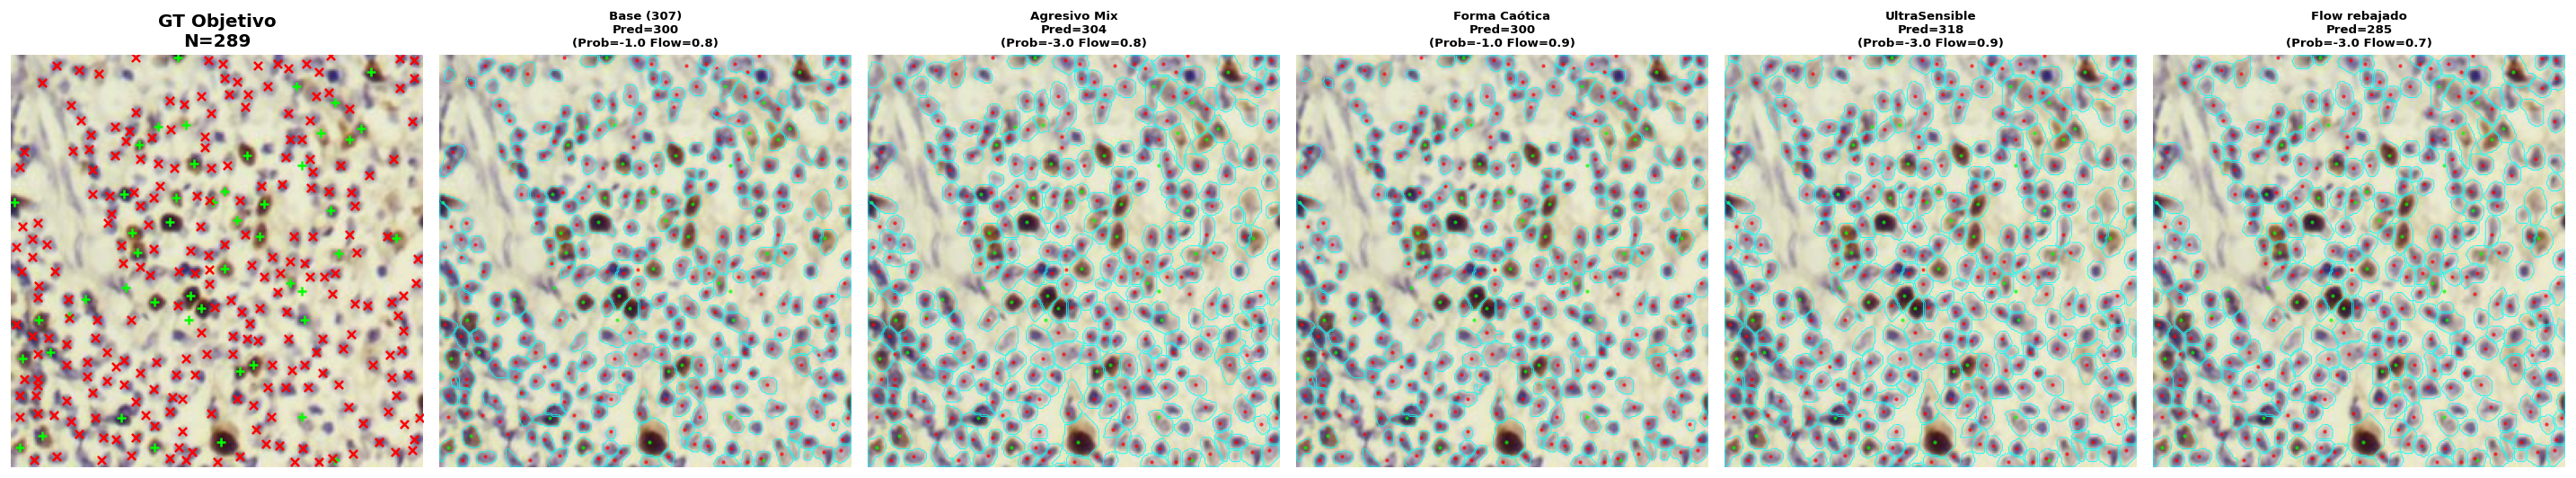

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
import warnings
import logging
from pathlib import Path
from cellpose import models, io, utils

TEST_DIR = Path("/media/HDD2/SHIDC-B-Ki-67/256x256 cropped images/test256")

MODEL_TYPE = 'cyto3' 
GPU = True

DIAMETRO_ESTANDAR = 15

CONFIGURACIONES = [
    {'prob': -1.0, 'flow': 0.8, 'min': 7, 'desc': 'Base'},
    {'prob': -3.0, 'flow': 0.8, 'min': 7, 'desc': 'Agresivo Mix'},
    {'prob': -1.0, 'flow': 0.9, 'min': 7, 'desc': 'Forma Caótica'},
    {'prob': -3.0, 'flow': 0.9, 'min': 5, 'desc': 'UltraSensible'},
    {'prob': -3.0, 'flow': 0.7, 'min': 7, 'desc': 'Flow rebajado'},
]


def load_gt_points(img_path):
    """Carga Ground Truth desde JSON."""
    json_path = img_path.with_suffix('.json')
    if not json_path.exists():
        return [], []
    
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    points_list = data if isinstance(data, list) else list(data.values())[0] if data else []
    
    pos, neg = [], []
    for pt in points_list:
        if pt.get('label_id') == 1: pos.append([pt['x'], pt['y']])
        else: neg.append([pt['x'], pt['y']])
            
    return np.array(pos), np.array(neg)

def visualizar_comparativa_cyto3(img_path):
    print(f"Analizando con CYTO3: {img_path.name}")

    img = io.imread(str(img_path))
    if img is None: return

    pts_pos, pts_neg = load_gt_points(img_path)
    total_gt = len(pts_pos) + len(pts_neg)

    try:
        print(f"Cargando modelo {MODEL_TYPE}...")
        model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error cargando modelo: {e}")
        return

    n_cols = len(CONFIGURACIONES) + 1
    fig, axes = plt.subplots(1, n_cols, figsize=(4 * n_cols, 5), dpi=120)
    
    axes[0].imshow(img)
    if len(pts_pos) > 0: axes[0].scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='+', s=40, linewidths=1.5)
    if len(pts_neg) > 0: axes[0].scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='x', s=30, linewidths=1.5)
    axes[0].set_title(f"GT Objetivo\nN={total_gt}", fontweight='bold')
    axes[0].axis('off')

    for i, config in enumerate(CONFIGURACIONES):
        ax = axes[i + 1]
        
        masks, flows, styles, diams = model.eval(img, 
                                          diameter=DIAMETRO_ESTANDAR,
                                          channels=[0,0], 
                                          invert=True, 
                                          cellprob_threshold=config['prob'],
                                          flow_threshold=config['flow'],
                                          min_size=config['min'])
        
        num_pred = masks.max()
        
        ax.imshow(img)
        
        outlines = utils.outlines_list(masks)
        for o in outlines:
            ax.plot(o[:, 0], o[:, 1], color='cyan', lw=0.5)
            
        if len(pts_pos) > 0: ax.scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='.', s=10, alpha=0.6)
        if len(pts_neg) > 0: ax.scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='.', s=10, alpha=0.6)

        title = f"{config['desc']}\nPred={num_pred}"
        subtitle = f"(Prob={config['prob']} Flow={config['flow']})"
        ax.set_title(f"{title}\n{subtitle}", fontsize=8, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    
    del model
    torch.cuda.empty_cache()

io.logger_setup()
logging.getLogger("cellpose").setLevel(logging.CRITICAL)

test_files = sorted(list(TEST_DIR.glob("*.jpg")))

if len(test_files) > 0:
    visualizar_comparativa_cyto3(test_files[0])
else:
    print(f"No se encontraron imágenes .jpg en {TEST_DIR}")

Test cuantitativo SD

In [1]:
import sys
import numpy as np
import pandas as pd
import json
import torch
import warnings
import logging
import cv2
import contextlib
import os
from pathlib import Path
from tqdm.auto import tqdm

from cellpose import models, core, io, utils


BASE_DIR = Path("/media/HDD2/SHIDC-B-Ki-67/256x256 cropped images")
DIRS_TO_PROCESS = [
    BASE_DIR / "train256"
]

CSV_OUTPUT = BASE_DIR / "reporte_metricas_cyto3_256.csv"

MODEL_TYPE = 'cyto3'
GPU = True

DIAMETRO_EVAL = 15 

CONFIGURACIONES = [
    {'prob': -1.0, 'flow': 0.8, 'min': 7, 'name': 'Base'},   
    {'prob': -3.0, 'flow': 0.8, 'min': 5, 'name': 'Agresivo_Mix'},
    {'prob': -3.0, 'flow': 0.9, 'min': 5, 'name': 'UltraSensible'},
]

MAX_IMGS = None


def load_gt_points(json_path):
    """Carga puntos Ground Truth de manera robusta."""
    if not json_path.exists():
        return []
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        points = []
        items = data if isinstance(data, list) else list(data.values())[0] if data else []
        for pt in items:
            if 'x' in pt and 'y' in pt:
                points.append([pt['x'], pt['y']])
        return np.array(points)
    except Exception as e:
        return []

def calculate_metrics(masks, gt_points):

    total_predicciones = masks.max()
    total_gt = len(gt_points)
    
    gt_detectados = 0
    masks_reales_encontradas = set()
    
    for point in gt_points:
        x, y = int(point[0]), int(point[1])
        if 0 <= y < masks.shape[0] and 0 <= x < masks.shape[1]:
            val = masks[y, x]
            if val > 0:
                gt_detectados += 1
                masks_reales_encontradas.add(val)
    
    falsos_positivos = total_predicciones - len(masks_reales_encontradas)
    n_perdidos = total_gt - gt_detectados
    
    return gt_detectados, n_perdidos, falsos_positivos, total_gt

def run_benchmark():
    io.logger_setup()
    logging.getLogger("cellpose").setLevel(logging.CRITICAL)
    warnings.filterwarnings("ignore")
    
    if not core.use_gpu():
        print("NO SE DETECTÓ GPU. Lento.")

    all_images = []
    for d in DIRS_TO_PROCESS:
        all_images.extend(sorted(list(d.glob("*.jpg"))))
    
    import random
    random.seed(42)
    random.shuffle(all_images)
    
    if MAX_IMGS and len(all_images) > MAX_IMGS:
        print(f"Recortando a {MAX_IMGS} imágenes.")
        all_images = all_images[:MAX_IMGS]
    else:
        print(f"Procesando dataset completo: {len(all_images)} imágenes.")


    print(f"Cargando modelo {MODEL_TYPE}...")
    try:
        with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
            model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error fatal: {e}")
        return

    resultados = []
    pbar = tqdm(all_images, desc="Benchmarking Cyto3")
    
    for img_path in pbar:
        img = io.imread(str(img_path))
        if img is None: continue
        
        gt_points = load_gt_points(img_path.with_suffix('.json'))
        
        for config in CONFIGURACIONES:
            try:
                with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
                    masks, _, _, diams = model.eval(img, 
                                             diameter=DIAMETRO_EVAL,
                                             channels=[0,0],
                                             invert=True,
                                             cellprob_threshold=config['prob'],
                                             flow_threshold=config['flow'],
                                             min_size=config['min'])
                
                det, lost, fp, total = calculate_metrics(masks, gt_points)
                
                resultados.append({
                    'Imagen': img_path.name,
                    'Configuracion': config['name'],
                    'GT_Detectados_Recall': det,
                    'GT_Perdidos': lost,
                    'Falsos_Positivos_Ruido': fp,
                    'Total_GT': total
                })
                
            except Exception as e:
                pbar.write(f"Error en {img_path.name}: {e}")

    if resultados:
        df = pd.DataFrame(resultados)
        df.to_csv(CSV_OUTPUT, index=False)
        print(f"\nGuardado en: {CSV_OUTPUT}")
        
        print(f"\nRESUMEN FINAL ({MODEL_TYPE.upper()} 256px):")
        resumen = df.groupby('Configuracion')[['GT_Detectados_Recall', 'GT_Perdidos', 'Falsos_Positivos_Ruido']].sum()
        
        total_preds = resumen['GT_Detectados_Recall'] + resumen['Falsos_Positivos_Ruido']
        resumen['Precision_Aprox_%'] = (resumen['GT_Detectados_Recall'] / total_preds * 100).fillna(0).round(2)
        
        total_gt_global = resumen['GT_Detectados_Recall'] + resumen['GT_Perdidos']
        resumen['Recall_Global_%'] = (resumen['GT_Detectados_Recall'] / total_gt_global * 100).fillna(0).round(2)

        print(resumen.sort_values(by='GT_Detectados_Recall', ascending=False))
    else:
        print("Sin resultados.")

if __name__ == "__main__":
    run_benchmark()

/media/HDD2/conda_envs_claudio/cellpose_v3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-01-02 16:55:05,321 [INFO] WRITING LOG OUTPUT TO /home/claudio/.cellpose/run.log
2026-01-02 16:55:05,322 [INFO] 
cellpose version: 	3.1.1.2 
platform:       	linux 
python version: 	3.10.18 
torch version:  	2.5.1+cu121
📂  Procesando dataset completo: 1656 imágenes.
⏳ Cargando modelo cyto3...


Benchmarking Cyto3: 100%|██████████| 1656/1656 [09:46<00:00,  2.82it/s]



✅ Guardado en: /media/HDD2/SHIDC-B-Ki-67/256x256 cropped images/reporte_metricas_cyto3_256.csv

📊 RESUMEN FINAL (CYTO3 256px):
               GT_Detectados_Recall  GT_Perdidos  Falsos_Positivos_Ruido  \
Configuracion                                                              
UltraSensible                104061         9167                  104744   
Agresivo_Mix                  97967        15261                   74719   
Base                          94189        19039                   72947   

               Precision_Aprox_%  Recall_Global_%  
Configuracion                                      
UltraSensible              49.84            91.90  
Agresivo_Mix               56.73            86.52  
Base                       56.35            83.19  


Test Cualitativo HD

🎯 Imagen objetivo encontrada: p1_0299_1.jpg
🔬 Analizando con CYTO3: p1_0299_1.jpg
⏳ Cargando modelo cyto3...


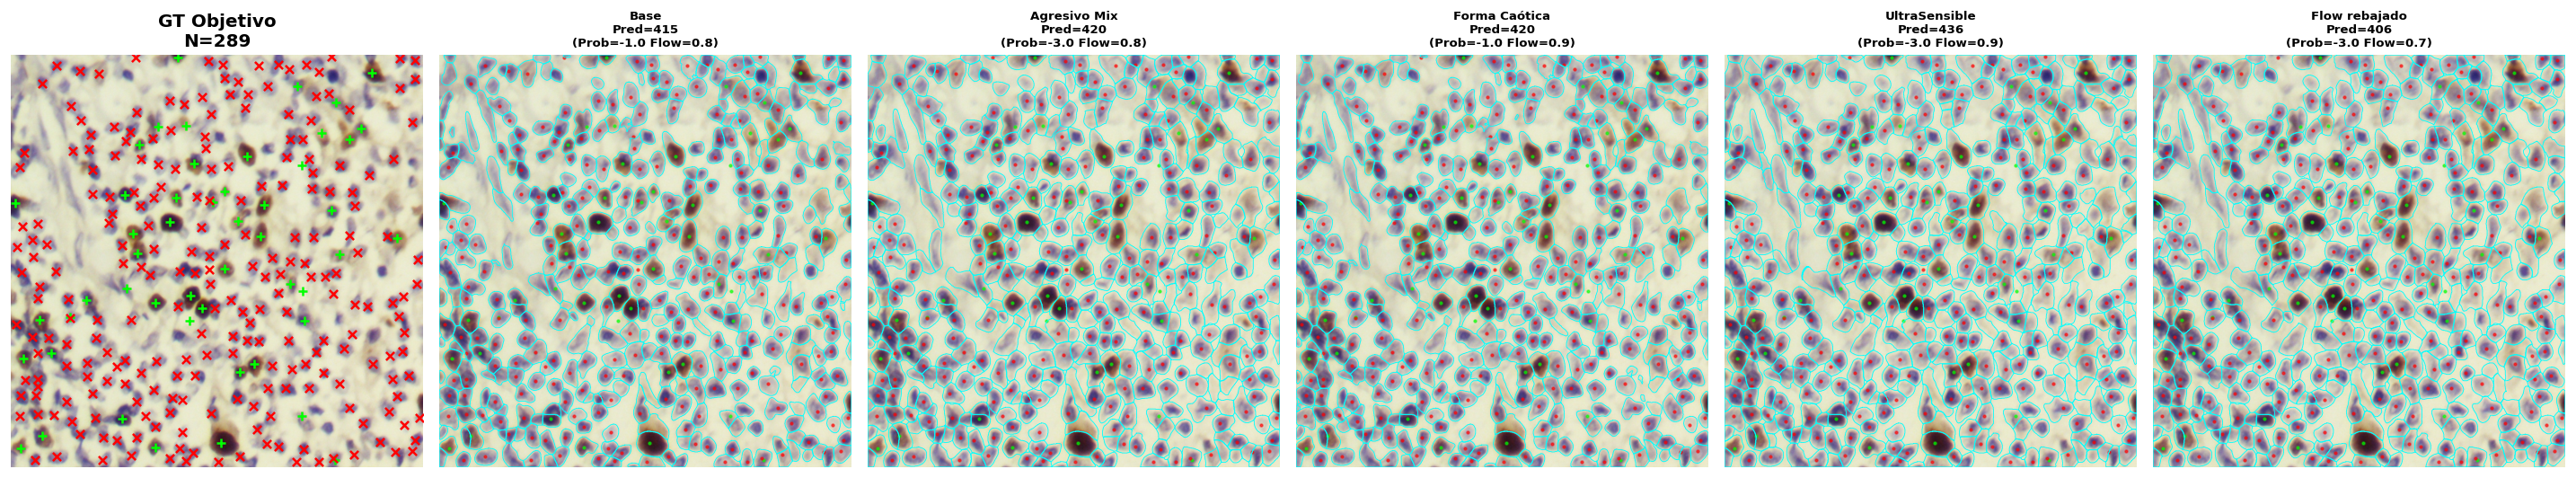

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
import warnings
import logging
from pathlib import Path
from cellpose import models, io, utils

TEST_DIR = Path("/media/HDD2/SHIDC-B-Ki-67/bare images/Test")
SELECTED_FILENAME = "p1_0299_1.jpg"

MODEL_TYPE = 'cyto3' 
GPU = True

DIAMETRO_ESTANDAR = 72

CONFIGURACIONES = [
    {'prob': -1.0, 'flow': 0.8, 'min': 30, 'desc': 'Base'},
    {'prob': -3.0, 'flow': 0.8, 'min': 30, 'desc': 'Agresivo Mix'},
    {'prob': -1.0, 'flow': 0.9, 'min': 30, 'desc': 'Forma Caótica'},
    {'prob': -3.0, 'flow': 0.9, 'min': 25, 'desc': 'UltraSensible'},
    {'prob': -3.0, 'flow': 0.7, 'min': 30, 'desc': 'Flow rebajado'},
]


def load_gt_points(img_path):
    """Carga Ground Truth desde JSON."""
    json_path = img_path.with_suffix('.json')
    if not json_path.exists():
        return [], []
    
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    points_list = data if isinstance(data, list) else list(data.values())[0] if data else []
    
    pos, neg = [], []
    for pt in points_list:
        if pt.get('label_id') == 1: pos.append([pt['x'], pt['y']])
        else: neg.append([pt['x'], pt['y']])
            
    return np.array(pos), np.array(neg)

def visualizar_comparativa_cyto3(img_path):
    print(f"Analizando con CYTO3: {img_path.name}")
    
    img = io.imread(str(img_path))
    if img is None: return

    pts_pos, pts_neg = load_gt_points(img_path)
    total_gt = len(pts_pos) + len(pts_neg)
    
    try:
        print(f"Cargando modelo {MODEL_TYPE}...")
        model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error cargando modelo: {e}")
        return
    n_cols = len(CONFIGURACIONES) + 1
    fig, axes = plt.subplots(1, n_cols, figsize=(4 * n_cols, 5), dpi=120)
    
    axes[0].imshow(img)
    if len(pts_pos) > 0: axes[0].scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='+', s=40, linewidths=1.5)
    if len(pts_neg) > 0: axes[0].scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='x', s=30, linewidths=1.5)
    axes[0].set_title(f"GT Objetivo\nN={total_gt}", fontweight='bold')
    axes[0].axis('off')

    for i, config in enumerate(CONFIGURACIONES):
        ax = axes[i + 1]

        masks, flows, styles, diams = model.eval(img, 
                                          diameter=DIAMETRO_ESTANDAR,
                                          channels=[0,0], 
                                          invert=True, 
                                          cellprob_threshold=config['prob'],
                                          flow_threshold=config['flow'],
                                          min_size=config['min'])
        
        num_pred = masks.max()
        
        ax.imshow(img)

        outlines = utils.outlines_list(masks)
        for o in outlines:
            ax.plot(o[:, 0], o[:, 1], color='cyan', lw=0.5)

        if len(pts_pos) > 0: ax.scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='.', s=10, alpha=0.6)
        if len(pts_neg) > 0: ax.scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='.', s=10, alpha=0.6)

        title = f"{config['desc']}\nPred={num_pred}"
        subtitle = f"(Prob={config['prob']} Flow={config['flow']})"
        ax.set_title(f"{title}\n{subtitle}", fontsize=8, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    
    del model
    torch.cuda.empty_cache()


io.logger_setup()
logging.getLogger("cellpose").setLevel(logging.CRITICAL)

target_path = TEST_DIR / SELECTED_FILENAME

if target_path.exists():
    print(f"Imagen objetivo encontrada: {SELECTED_FILENAME}")
    visualizar_comparativa_cyto3(target_path)
else:
    print(f"NO SE ENCONTRÓ: {SELECTED_FILENAME}")
    print("Buscando alternativas en la carpeta...")
    
    test_files = sorted(list(TEST_DIR.glob("*.jpg")))
    if len(test_files) > 0:
        print(f"Usando la primera disponible: {test_files[0].name}")
        visualizar_comparativa_cyto3(test_files[0])
    else:
        print(f"No hay imágenes .jpg en {TEST_DIR}")

Test Cuantitativo HD

In [3]:
import sys
import numpy as np
import pandas as pd
import json
import torch
import warnings
import logging
import cv2
import contextlib
import os
from pathlib import Path
from tqdm.auto import tqdm

from cellpose import models, core, io, utils


BASE_DIR = Path("/media/HDD2/SHIDC-B-Ki-67/bare images")
DIRS_TO_PROCESS = [
    BASE_DIR / "Train"
]

CSV_OUTPUT = BASE_DIR / "reporte_metricas_cyto3_HD.csv"

MODEL_TYPE = 'cyto3' 
GPU = True

DIAMETRO_EVAL = 72 

CONFIGURACIONES = [
    {'prob': -1.0, 'flow': 0.8, 'min': 30, 'name': 'Base'},
    {'prob': -3.0, 'flow': 0.8, 'min': 30, 'name': 'Agresivo_Mix'},
    {'prob': -3.0, 'flow': 0.9, 'min': 25, 'name': 'UltraSensible'},
]


MAX_IMGS = None 

def load_gt_points(json_path):
    """Carga puntos Ground Truth de manera robusta."""
    if not json_path.exists():
        return []
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        points = []
        items = data if isinstance(data, list) else list(data.values())[0] if data else []
        for pt in items:
            if 'x' in pt and 'y' in pt:
                points.append([pt['x'], pt['y']])
        return np.array(points)
    except Exception as e:
        return []

def calculate_metrics(masks, gt_points):

    total_predicciones = masks.max()
    total_gt = len(gt_points)
    
    gt_detectados = 0
    masks_reales_encontradas = set()
    
    for point in gt_points:
        x, y = int(point[0]), int(point[1])
        
        if 0 <= y < masks.shape[0] and 0 <= x < masks.shape[1]:
            val = masks[y, x]
            if val > 0:
                gt_detectados += 1
                masks_reales_encontradas.add(val)
    
    falsos_positivos = total_predicciones - len(masks_reales_encontradas)
    n_perdidos = total_gt - gt_detectados
    
    return gt_detectados, n_perdidos, falsos_positivos, total_gt

def run_benchmark():
    io.logger_setup()
    logging.getLogger("cellpose").setLevel(logging.CRITICAL)
    warnings.filterwarnings("ignore")
    
    if not core.use_gpu():
        print("NO SE DETECTÓ GPU. Lento.")

    all_images = []
    for d in DIRS_TO_PROCESS:
        all_images.extend(sorted(list(d.glob("*.jpg"))))
    
    import random
    random.seed(42)
    random.shuffle(all_images)
    
    if MAX_IMGS and len(all_images) > MAX_IMGS:
        print(f"Recortando a {MAX_IMGS} imágenes.")
        all_images = all_images[:MAX_IMGS]
    else:
        print(f"Procesando dataset completo: {len(all_images)} imágenes.")

    print(f"Cargando modelo {MODEL_TYPE}...")
    try:
        with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
            model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error fatal: {e}")
        return
    resultados = []
    pbar = tqdm(all_images, desc="Benchmarking Cyto3")
    
    for img_path in pbar:
        img = io.imread(str(img_path))
        if img is None: continue
        
        gt_points = load_gt_points(img_path.with_suffix('.json'))
        
        for config in CONFIGURACIONES:
            try:
                with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
                    masks, _, _, diams = model.eval(img, 
                                             diameter=DIAMETRO_EVAL,
                                             channels=[0,0],
                                             invert=True,
                                             cellprob_threshold=config['prob'],
                                             flow_threshold=config['flow'],
                                             min_size=config['min'])
                
                det, lost, fp, total = calculate_metrics(masks, gt_points)
                
                resultados.append({
                    'Imagen': img_path.name,
                    'Configuracion': config['name'],
                    'GT_Detectados_Recall': det,
                    'GT_Perdidos': lost,
                    'Falsos_Positivos_Ruido': fp,
                    'Total_GT': total
                })
                
            except Exception as e:
                pbar.write(f"Error en {img_path.name}: {e}")

    if resultados:
        df = pd.DataFrame(resultados)
        df.to_csv(CSV_OUTPUT, index=False)
        print(f"\n Guardado en: {CSV_OUTPUT}")
        
        print(f"\n RESUMEN FINAL ({MODEL_TYPE.upper()} 1228x):")
        resumen = df.groupby('Configuracion')[['GT_Detectados_Recall', 'GT_Perdidos', 'Falsos_Positivos_Ruido']].sum()
        
        total_preds = resumen['GT_Detectados_Recall'] + resumen['Falsos_Positivos_Ruido']
        resumen['Precision_Aprox_%'] = (resumen['GT_Detectados_Recall'] / total_preds * 100).fillna(0).round(2)
        
        total_gt_global = resumen['GT_Detectados_Recall'] + resumen['GT_Perdidos']
        resumen['Recall_Global_%'] = (resumen['GT_Detectados_Recall'] / total_gt_global * 100).fillna(0).round(2)

        print(resumen.sort_values(by='GT_Detectados_Recall', ascending=False))
    else:
        print("Sin resultados.")

if __name__ == "__main__":
    run_benchmark()

📂  Procesando dataset completo: 1656 imágenes.
⏳ Cargando modelo cyto3...


Benchmarking Cyto3:   0%|          | 0/1656 [00:00<?, ?it/s]

Benchmarking Cyto3: 100%|██████████| 1656/1656 [1:14:48<00:00,  2.71s/it]


✅ Guardado en: /media/HDD2/SHIDC-B-Ki-67/bare images/reporte_metricas_cyto3_HD.csv

📊 RESUMEN FINAL (CYTO3 1228x):
               GT_Detectados_Recall  GT_Perdidos  Falsos_Positivos_Ruido  \
Configuracion                                                              
UltraSensible                110256         2972                  205122   
Agresivo_Mix                 108454         4774                  166872   
Base                         106159         7069                  154520   

               Precision_Aprox_%  Recall_Global_%  
Configuracion                                      
UltraSensible              34.96            97.38  
Agresivo_Mix               39.39            95.78  
Base                       40.72            93.76  


Pruebas BCData

2026-01-13 10:28:27,914 [INFO] WRITING LOG OUTPUT TO /home/claudio/.cellpose/run.log
2026-01-13 10:28:27,915 [INFO] 
cellpose version: 	3.1.1.2 
platform:       	linux 
python version: 	3.10.18 
torch version:  	2.5.1+cu121
🎯 Imagen objetivo encontrada: 0.png
🔬 Analizando: 0.png
⏳ Cargando modelo cyto3...


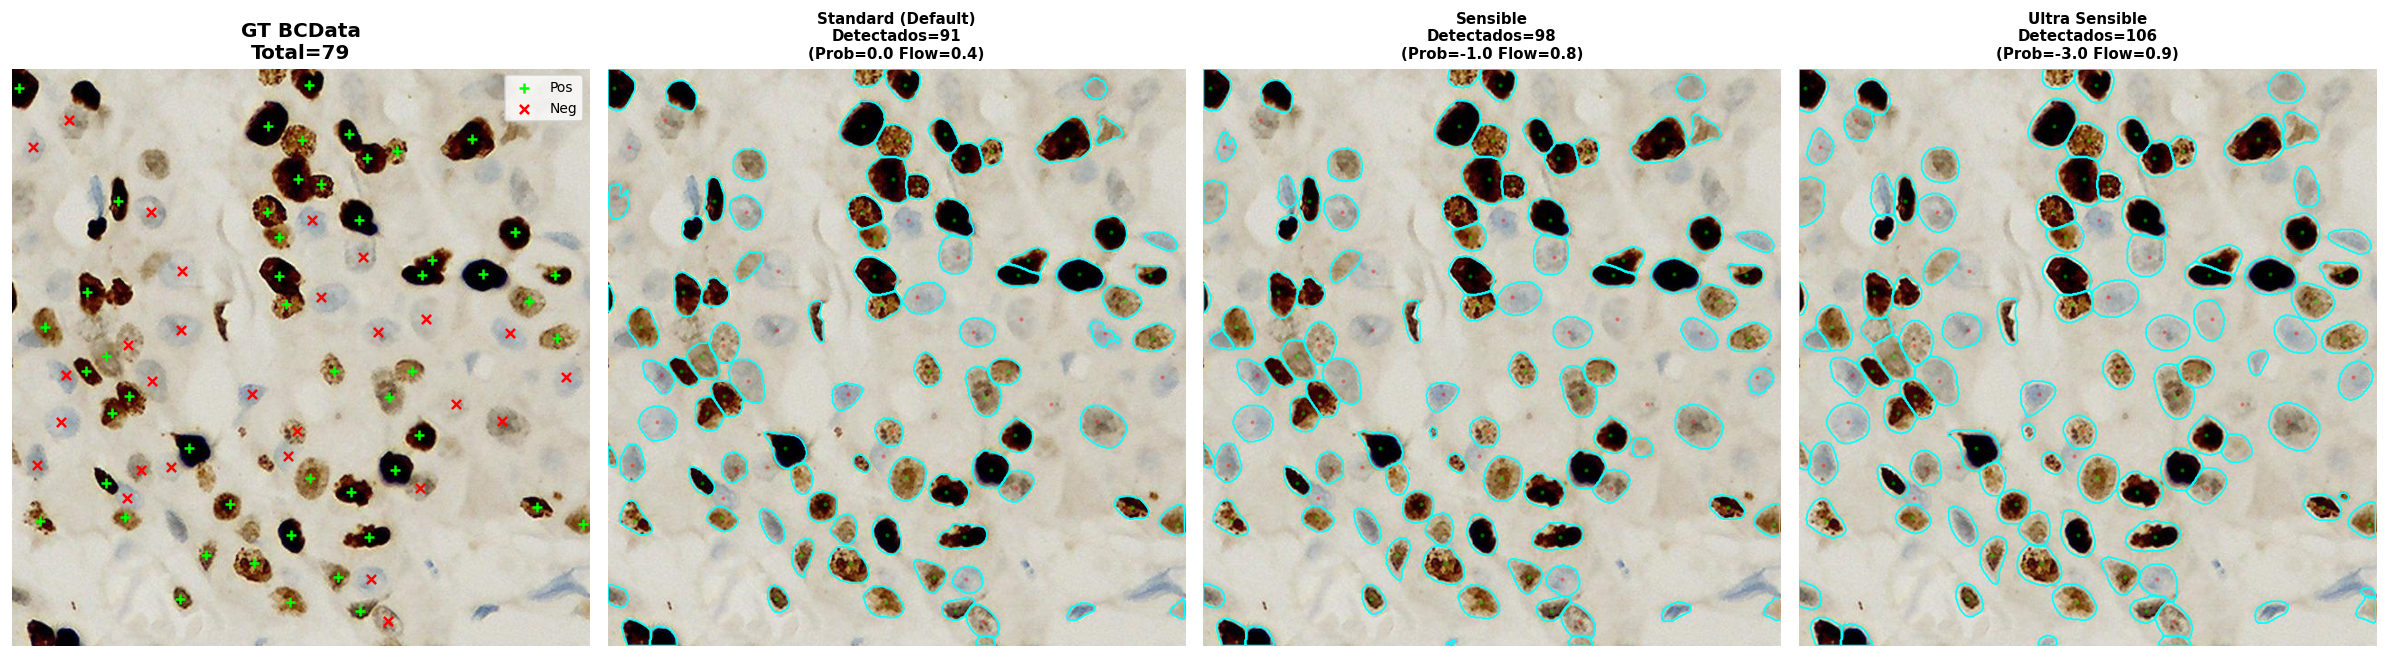

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import torch
import warnings
import logging
from pathlib import Path
from cellpose import models, io, utils

BASE_ROOT = Path("/media/HDD2/BCData/BCData")
IMG_DIR = BASE_ROOT / "images/train"
GT_POS_DIR = BASE_ROOT / "annotations/train/positive"
GT_NEG_DIR = BASE_ROOT / "annotations/train/negative"

SELECTED_FILENAME = "0.png"

MODEL_TYPE = "cyto3"
GPU = True

DIAMETRO_ESTANDAR = 47

CONFIGURACIONES = [
    {'prob': 0.0,  'flow': 0.4, 'min': 20, 'desc': 'Standard (Default)'},
    {'prob': -1.0, 'flow': 0.8, 'min': 20, 'desc': 'Sensible'},
    {'prob': -3.0, 'flow': 0.9, 'min': 20, 'desc': 'Ultra Sensible'},
]


def load_gt_points_bcdata(img_path):
    """
    Carga Ground Truth desde archivos .h5 separados (Positive/Negative).
    Retorna dos arrays numpy: (pos_coords, neg_coords)
    """
    img_stem = img_path.stem  
    h5_name = f"{img_stem}.h5"

    pos_path = GT_POS_DIR / h5_name
    neg_path = GT_NEG_DIR / h5_name

    def extract_coords(path: Path):
        if not path.exists():
            return np.array([])
        try:
            with h5py.File(path, 'r') as f:
                if 'coordinates' in f.keys():
                    return np.asarray(f['coordinates'])
                elif 'coordinate' in f.keys():
                    return np.asarray(f['coordinate'])
        except Exception:
            return np.array([])
        return np.array([])

    pts_pos = extract_coords(pos_path)
    pts_neg = extract_coords(neg_path)

    return pts_pos, pts_neg


def visualizar_comparativa(img_path: Path):
    print(f"Analizando: {img_path.name}")

    img = io.imread(str(img_path))
    if img is None:
        print("Error cargando imagen.")
        return
    pts_pos, pts_neg = load_gt_points_bcdata(img_path)
    total_gt = len(pts_pos) + len(pts_neg)

    try:
        print(f"Cargando modelo {MODEL_TYPE}...")
        model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error cargando modelo: {e}")
        return

    n_cols = len(CONFIGURACIONES) + 1
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 6), dpi=120)

    axes[0].imshow(img)
    if len(pts_pos) > 0:
        axes[0].scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='+', s=40,
                        linewidths=1.5, label='Pos')
    if len(pts_neg) > 0:
        axes[0].scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='x', s=30,
                        linewidths=1.5, label='Neg')
    axes[0].set_title(f"GT BCData\nTotal={total_gt}", fontweight='bold')
    axes[0].legend(loc='upper right', fontsize='small')
    axes[0].axis('off')

    for i, config in enumerate(CONFIGURACIONES):
        ax = axes[i + 1]

        masks, flows, styles, diams = model.eval(
            img,
            diameter=DIAMETRO_ESTANDAR,
            channels=[0, 0],     
            invert=True,       
            cellprob_threshold=config['prob'],
            flow_threshold=config['flow'],
            min_size=config['min']
        )

        num_pred = int(masks.max())

        ax.imshow(img)

        outlines = utils.outlines_list(masks)
        for o in outlines:
            ax.plot(o[:, 0], o[:, 1], color='cyan', lw=1)

        if len(pts_pos) > 0:
            ax.scatter(pts_pos[:, 0], pts_pos[:, 1], c='lime', marker='.', s=10, alpha=0.3)
        if len(pts_neg) > 0:
            ax.scatter(pts_neg[:, 0], pts_neg[:, 1], c='red', marker='.', s=10, alpha=0.3)
        title = f"{config['desc']}\nDetectados={num_pred}"
        subtitle = f"(Prob={config['prob']} Flow={config['flow']})"
        ax.set_title(f"{title}\n{subtitle}", fontsize=9, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    del model
    torch.cuda.empty_cache()


io.logger_setup()
logging.getLogger("cellpose").setLevel(logging.CRITICAL)

target_path = IMG_DIR / SELECTED_FILENAME

if target_path.exists():
    print(f"Imagen objetivo encontrada: {SELECTED_FILENAME}")
    visualizar_comparativa(target_path)
else:
    print(f"NO SE ENCONTRÓ: {SELECTED_FILENAME}")
    print(" Buscando alternativas en la carpeta train...")

    test_files = sorted(list(IMG_DIR.glob("*.png")))
    if not test_files:
        test_files = sorted(list(IMG_DIR.glob("*.jpg")))

    if len(test_files) > 0:
        print(f"Usando la primera disponible: {test_files[0].name}")
        visualizar_comparativa(test_files[0])
    else:
        print(f"No hay imágenes en {IMG_DIR}")


Test Cuantitativo BCData

In [2]:
import sys
import numpy as np
import pandas as pd
import h5py
import torch
import warnings
import logging
import contextlib
import os
from pathlib import Path
from tqdm.auto import tqdm

from cellpose import models, core, io, utils

BASE_ROOT = Path("/media/HDD2/BCData/BCData")
IMG_DIR = BASE_ROOT / "images/train"
GT_POS_DIR = BASE_ROOT / "annotations/train/positive"
GT_NEG_DIR = BASE_ROOT / "annotations/train/negative"

CSV_OUTPUT = BASE_ROOT / "reporte_metricas_cyto3_BCData.csv"

MODEL_TYPE = "cyto3"
GPU = True
DIAMETRO_EVAL = 47

CONFIGURACIONES = [
    {'prob': 0.0,  'flow': 0.4, 'min': 20, 'name': 'Standard'},
    {'prob': -1.0, 'flow': 0.8, 'min': 20, 'name': 'Sensible'},
    {'prob': -3.0, 'flow': 0.9, 'min': 20, 'name': 'UltraSensible'},
]

MAX_IMGS = None


def load_gt_points_bcdata(img_path: Path):
    """
    Carga GT desde .h5 separados (pos/neg) y retorna un solo array (x,y) concatenado.
    """
    img_stem = img_path.stem  
    h5_name = f"{img_stem}.h5"

    pos_path = GT_POS_DIR / h5_name
    neg_path = GT_NEG_DIR / h5_name

    def extract_coords(path: Path):
        if not path.exists():
            return np.empty((0, 2), dtype=np.float32)
        try:
            with h5py.File(path, "r") as f:
                if "coordinates" in f.keys():
                    arr = np.asarray(f["coordinates"])
                elif "coordinate" in f.keys():
                    arr = np.asarray(f["coordinate"])
                else:
                    return np.empty((0, 2), dtype=np.float32)

            arr = np.asarray(arr)
            if arr.size == 0:
                return np.empty((0, 2), dtype=np.float32)
            if arr.ndim == 1 and arr.shape[0] == 2:
                arr = arr.reshape(1, 2)
            if arr.ndim != 2 or arr.shape[1] != 2:
                return np.empty((0, 2), dtype=np.float32)

            return arr.astype(np.float32)
        except Exception:
            return np.empty((0, 2), dtype=np.float32)

    pts_pos = extract_coords(pos_path)
    pts_neg = extract_coords(neg_path)

    if pts_pos.shape[0] == 0 and pts_neg.shape[0] == 0:
        return np.empty((0, 2), dtype=np.float32)

    return np.vstack([pts_pos, pts_neg]).astype(np.float32)


def calculate_metrics(masks: np.ndarray, gt_points: np.ndarray):
    """
    Misma métrica que tu versión SHIDC (O(N)):
    - total_predicciones = masks.max()
    - gt_detectados: cuántos puntos GT caen dentro de alguna máscara (>0)
    - masks_reales_encontradas: IDs de máscara distintas tocadas por GT
    - falsos_positivos = total_predicciones - #masks tocadas por GT
    - n_perdidos = total_gt - gt_detectados
    """
    total_predicciones = int(masks.max())
    total_gt = int(len(gt_points))

    gt_detectados = 0
    masks_reales_encontradas = set()

    for point in gt_points:
        x, y = int(point[0]), int(point[1]) 
        if 0 <= y < masks.shape[0] and 0 <= x < masks.shape[1]:
            val = int(masks[y, x])
            if val > 0:
                gt_detectados += 1
                masks_reales_encontradas.add(val)

    falsos_positivos = total_predicciones - len(masks_reales_encontradas)
    n_perdidos = total_gt - gt_detectados

    return gt_detectados, n_perdidos, falsos_positivos, total_gt

def run_benchmark():
    io.logger_setup()
    logging.getLogger("cellpose").setLevel(logging.CRITICAL)
    warnings.filterwarnings("ignore")

    if GPU and not core.use_gpu():
        print("GPU=True pero Cellpose no detectó GPU. Lento.")

    all_images = sorted(list(IMG_DIR.glob("*.png")))
    if not all_images:
        all_images = sorted(list(IMG_DIR.glob("*.jpg")))

    import random
    random.seed(42)
    random.shuffle(all_images)

    if MAX_IMGS and len(all_images) > MAX_IMGS:
        print(f"Recortando a {MAX_IMGS} imágenes.")
        all_images = all_images[:MAX_IMGS]
    else:
        print(f"Procesando dataset completo: {len(all_images)} imágenes.")

    print(f"Cargando modelo {MODEL_TYPE}...")
    try:
        with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
            model = models.Cellpose(gpu=GPU, model_type=MODEL_TYPE)
    except Exception as e:
        print(f"Error fatal cargando modelo: {e}")
        return

    resultados = []
    pbar = tqdm(all_images, desc="Benchmarking Cyto3 (BCData)")

    for img_path in pbar:
        img = io.imread(str(img_path))
        if img is None:
            continue

        gt_points = load_gt_points_bcdata(img_path)

        for config in CONFIGURACIONES:
            try:
                with open(os.devnull, "w") as f, contextlib.redirect_stdout(f), contextlib.redirect_stderr(f):
                    masks, flows, styles, diams = model.eval(
                        img,
                        diameter=DIAMETRO_EVAL,
                        channels=[0, 0],
                        invert=True, 
                        cellprob_threshold=config["prob"],
                        flow_threshold=config["flow"],
                        min_size=config["min"],
                    )

                det, lost, fp, total = calculate_metrics(masks, gt_points)

                resultados.append({
                    "Imagen": img_path.name,
                    "Configuracion": config["name"],
                    "GT_Detectados_Recall": det,
                    "GT_Perdidos": lost,
                    "Falsos_Positivos_Ruido": fp,
                    "Total_GT": total,
                })

            except Exception as e:
                pbar.write(f"Error en {img_path.name} ({config['name']}): {e}")

    if resultados:
        df = pd.DataFrame(resultados)
        df.to_csv(CSV_OUTPUT, index=False)
        print(f"\nGuardado en: {CSV_OUTPUT}")

        print(f"\nRESUMEN FINAL ({MODEL_TYPE.upper()} - BCData):")
        resumen = df.groupby("Configuracion")[["GT_Detectados_Recall", "GT_Perdidos", "Falsos_Positivos_Ruido"]].sum()

        total_preds = resumen["GT_Detectados_Recall"] + resumen["Falsos_Positivos_Ruido"]
        resumen["Precision_Aprox_%"] = (resumen["GT_Detectados_Recall"] / total_preds * 100).fillna(0).round(2)

        total_gt_global = resumen["GT_Detectados_Recall"] + resumen["GT_Perdidos"]
        resumen["Recall_Global_%"] = (resumen["GT_Detectados_Recall"] / total_gt_global * 100).fillna(0).round(2)

        print(resumen.sort_values(by="GT_Detectados_Recall", ascending=False))
    else:
        print("Sin resultados.")

if __name__ == "__main__":
    run_benchmark()


/media/HDD2/conda_envs_claudio/cellpose_v3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📂  Procesando dataset completo: 803 imágenes.
⏳ Cargando modelo cyto3...


Benchmarking Cyto3 (BCData): 100%|██████████| 803/803 [10:05<00:00,  1.33it/s]



✅ Guardado en: /media/HDD2/BCData/BCData/reporte_metricas_cyto3_BCData.csv

📊 RESUMEN FINAL (CYTO3 - BCData):
               GT_Detectados_Recall  GT_Perdidos  Falsos_Positivos_Ruido  \
Configuracion                                                              
UltraSensible                 83276        10562                   38966   
Sensible                      77387        16451                   31147   
Standard                      71911        21927                   23078   

               Precision_Aprox_%  Recall_Global_%  
Configuracion                                      
UltraSensible              68.12            88.74  
Sensible                   71.30            82.47  
Standard                   75.70            76.63  
